# Keras: Try various CNN networks on MNIST dataset

# Description:

# Objective:

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K

import keras

from prettytable import PrettyTable

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [4]:
print("Number of training examples : " + str(x_train.shape[0]) + " and each image is of shape ({}, {})".format(x_train.shape[1], x_train.shape[2]))
print("Number of test examples : " + str(x_test.shape[0]) + " and each image is of shape ({}, {})".format(x_test.shape[1], x_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

x_train = x_train / 255
x_test = x_test /255

In [6]:
# example data point after normlizing
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [7]:
# here we are having a class number for each image
print("Class label of first image : " + str(y_train[0]))

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : " + str(y_train[0]))

Class label of first image : 5
After converting the output into a vector : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
batch_size = 128
num_classes = 10
epochs = 50

In [0]:
def plt_dynamic(x, vy, ty, ax, fig, title, colors = ['b']):
    
    '''
     This function is used to update the plots for each epoch and error
    '''
    ax.plot(x, vy, 'b', label = "Validation Loss")
    ax.plot(x, ty, 'r', label = "Train loss")
    plt.legend()
    plt.grid()
    plt.title(title)
    fig.canvas.draw()

In [0]:
def plot_epoch_crossentropy_loss(model, n_epoch, title):
    fig,ax = plt.subplots(1, 1)
    ax.set_xlabel('epoch')
    ax.set_ylabel('Categorical Crossentropy Loss')

    x = list(range(1, n_epoch+1))

    vy = model.history['val_loss']
    ty = model.history['loss']
    plt_dynamic(x, vy, ty, ax, fig, title)

In [0]:
def cnn_3_layer():
  '''
    This function is to define the model and compile for two hidden layers
  '''
        
  # Defining
  model = Sequential()
  
  model.add(Conv2D(32, kernel_size=(3, 3),
                   activation='relu',
                   input_shape=input_shape, kernel_initializer='he_normal'))
  
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  
  model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

  print(model.summary())
  
  model_fit = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test)
                       )
  
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test score:', score[0]) 
  print('Test accuracy:', score[1])
        
  plot_epoch_crossentropy_loss(model_fit, epochs, "epoch vs crossentropy loss for 3 CNNs of kernel (3, 3)")
        
  return round(score[1]*100, 2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxP

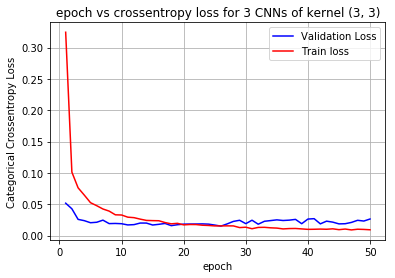

In [12]:
cnn_3_layer_acc = cnn_3_layer()

In [0]:
def cnn_5_layer():
  '''
    This function is to define the model and compile for two hidden layers
  '''
        
  # Defining
  model = Sequential()
  
  model.add(Conv2D(32, kernel_size=(5, 5),
                   activation='relu',
                   input_shape=input_shape, padding='same', kernel_initializer='he_normal'))
  
  model.add(Conv2D(32, (5, 5), activation='relu', padding='same', kernel_initializer='he_normal'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(32, (5, 5), activation='relu', padding='same', kernel_initializer='he_normal'))
  
  model.add(Conv2D(32, (5, 5), activation='relu', padding='same', kernel_initializer='he_normal'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Conv2D(32, (5, 5), activation='relu', padding='same', kernel_initializer='he_normal'))
  model.add(Dropout(0.2))
  
  model.add(Flatten())
  
  model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

  print(model.summary())
  
  model_fit = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test)
                       )
  
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test score:', score[0]) 
  print('Test accuracy:', score[1])
        
  plot_epoch_crossentropy_loss(model_fit, epochs, "epoch vs crossentropy loss for 5 CNNs of kernel (5, 5)")
        
  return round(score[1]*100, 2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 32)          128       
__________

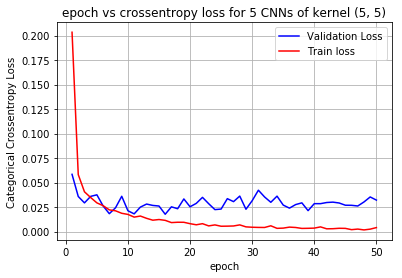

In [14]:
cnn_5_layer_acc = cnn_5_layer()

In [0]:
def cnn_7_layer():
  '''
    This function is to define the model and compile for two hidden layers
  '''
        
  # Defining
  model = Sequential()
  
  model.add(Conv2D(64, kernel_size=(2, 2),
                   activation='relu',
                   input_shape=input_shape, padding='same', kernel_initializer='he_normal'))
  
  model.add(Conv2D(32, (2, 2), activation='relu', padding='same', kernel_initializer='he_normal'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(64, (2, 2), activation='relu', padding='same', kernel_initializer='he_normal'))
  
  model.add(Conv2D(32, (2, 2), activation='relu', padding='same', kernel_initializer='he_normal'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(64, (2, 2), activation='relu', padding='same', kernel_initializer='he_normal'))
  model.add(Conv2D(32, (2, 2), activation='relu', padding='same', kernel_initializer='he_normal'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  
  model.add(Conv2D(64, (2, 2), activation='relu', padding='same', kernel_initializer='he_normal'))
  
  model.add(Flatten())
  
  model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
  model.add(Dropout(0.5))
  
  model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
  model.add(Dropout(0.5))
  
  model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

  print(model.summary())
  
  model_fit = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test)
                       )
  
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test score:', score[0]) 
  print('Test accuracy:', score[1])
        
  plot_epoch_crossentropy_loss(model_fit, epochs, "epoch vs crossentropy loss for 7 CNNs of kernel (2, 2)")
        
  return round(score[1]*100, 2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 32)          0         
__________

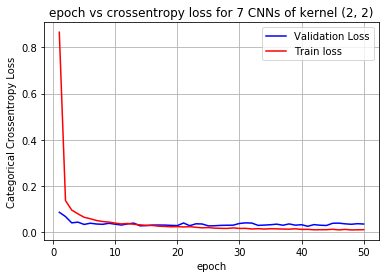

In [16]:
cnn_7_layer_acc = cnn_7_layer()

In [17]:
x = PrettyTable()
x.field_names = ["Model", "# of Conv Layers", "Kernel Size", "# epochs", "Accuracy"]
x.add_row(["CNN",'3','(3, 3)',epochs, cnn_3_layer_acc])
x.add_row(["CNN",'5','(5, 5)',epochs, cnn_5_layer_acc])
x.add_row(["CNN",'7','(2, 2)',epochs, cnn_7_layer_acc])
print(x)

+-------+------------------+-------------+----------+----------+
| Model | # of Conv Layers | Kernel Size | # epochs | Accuracy |
+-------+------------------+-------------+----------+----------+
|  CNN  |        3         |    (3, 3)   |    50    |   99.5   |
|  CNN  |        5         |    (5, 5)   |    50    |  99.41   |
|  CNN  |        7         |    (2, 2)   |    50    |  99.34   |
+-------+------------------+-------------+----------+----------+
